In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='face.jpg', img=frame)
            webcam.release()
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

In [3]:
IMG_SIZE = 145
def prepare(filepath, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("Driver_Drowsiness.h5")

In [4]:
prediction = model.predict([prepare('face.jpg')])
n1 = np.argmax(prediction)

1/1 [==============================] - 0s 112ms/step


In [5]:
# Load the image
image = cv2.imread('face.jpg')

# Load the eye detector classifier
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect the eyes
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Crop the eyes
for (x, y, w, h) in eyes:
    eye_image = image[y:y+h, x:x+w]
    cv2.imwrite('Eye_Image.jpg', eye_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [6]:
n2 = 0
image_path = 'eye_image.jpg'

if os.path.exists(image_path):
    prediction = model.predict([prepare('eye_image.jpg')])
    n2 = np.argmax(prediction)
else:
    k = 0

1/1 [==============================] - 0s 29ms/step


In [7]:
image_path = 'eye_image.jpg'

if os.path.exists(image_path):
    os.remove(image_path)

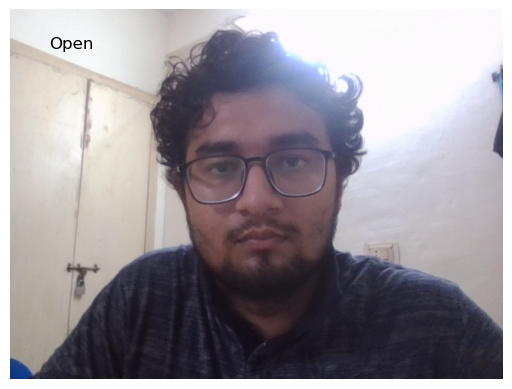

In [8]:
if n1 == n2:
    label = "Open"
else:
    label = "Closed"
    
# Convert the color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(image)
plt.axis('off')
plt.text(50, 50, label, color='black', fontsize=12)

plt.show()
